<a href="https://colab.research.google.com/github/kaylanelira/sistemas-inteligentes/blob/main/Mini_Projeto_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINI-PROJETO MLP - Sintomas da Lombalgia**
---


Grupo:
- [Kaylane Lira (kgl)](https://github.com/kaylanelira)
- [Luan Eustáquio (lelf)](https://github.com/luaneustaquio)
- [Otávio Francisco (ohbf)](https://github.com/otavio-hbf)
- [Pedro Basílio (pbgs2)](https://github.com/Pbgsa)
- [Thiago Ramalho (trm4)](https://github.com/Thiago-Ramalho)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Preparação do Ambiente:**

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score

## **Carregamento e Exploração do Conjunto de Dados:**

In [ ]:
# Carregar o conjunto de dados
df = pd.read_csv("/content/drive/MyDrive/SI/Dataset_spine.csv")

Abaixo são feitas algumas alterações no Dataset tanto para melhor compreensão das informações quanto para devidamente aplicar as funções que implementam o MLP.

In [ ]:
#Alteração dos nomes das colunas
column_names = {"Col1": "pelvic_incidence", "Col2": "pelvic tilt", "Col3": "lumbar_lordosis_angle", "Col4": "sacral_slope", "Col5": "pelvic_radius", "Col6": "degree_spondylolisthesis", "Col7": "pelvic_slope", "Col8": "Direct_tilt", "Col9": "thoracic_slope", "Col10": "cervical_tilt", "Col11": "sacrum_angle","Col12": "scoliosis_slope"}
df = df.rename(columns=column_names)

#Trocando os valores de resultado para 1 e 0. Isso facilita a aplicação da implementação do scikit.
df = df.replace({"Abnormal": 1, "Normal": 0})

#Excluindo uma coluna que não tem informações relevantes
df = df.drop(columns="Unnamed: 13")

# Exibir as primeiras linhas do conjunto de dados
df.head(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,1


#**Pré-processamento dos Dados:**

Em seguida, são feitas modificações para balancear o dataset, que como se pode ver na celula abaixo, possui muito mais casos positivos do que negativos.

In [ ]:
# Verificar a contagem de cada classe
df['Class_att'].value_counts()

1    210
0    100
Name: Class_att, dtype: int64

Usando o módulo imblearn.over_sampling aplicou-se a função de SMOTE na categoria "minority" para balancear o dataset replicando casos negativos.

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy= 'minority', random_state=42)

X_df = df.iloc[:, :-1]
Y_df = df.iloc[:, -1]
X_res, y_res = sm.fit_resample(X_df, Y_df)

In [ ]:
y_res.value_counts()

1    210
0    210
Name: Class_att, dtype: int64

In [ ]:
X_res['Class_att'] = y_res.values
df_balanced = X_res.copy()

Por fim, para não enviesar o modelo com um dataset ordenado, foi realizado um embaralhamento das linhas no dataset proporcional.

In [ ]:
# Embaralhar o conjunto de dados
df_bl_sh = df_balanced.sample(frac = 1) #shuffle database
df_bl_sh.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
241,51.529358,13.517847,35.000000,38.011510,126.718516,13.928331,0.863545,33.262800,11.087000,12.420930,-15.259539,18.293600,0
218,51.624672,15.969344,35.000000,35.655328,129.385308,1.009228,0.005045,32.420000,13.814900,11.284900,-25.770956,35.619100,0
154,41.187770,5.792974,42.867392,35.394796,103.348880,27.660277,0.044130,21.075700,10.537400,9.667480,-9.571667,30.525300,1
404,47.864479,9.390345,35.616903,38.474134,119.885351,2.394901,0.644409,27.292283,14.929347,13.544248,-2.119558,36.473591,0
263,33.788843,3.675110,25.500000,30.113733,128.325356,-1.776111,0.389858,9.673000,11.312900,13.237310,-2.244119,10.292500,0


### **Retirando Outliers**

Com base nessa representação, é possível notar alguns outliers. Por exemplo, no *sacral_slope*, temos um dado acima de 120, enquanto os outros estão abaixo de 80. Será necessário tratar esses casos, retirando os outliers.

Para isso, utilizaremos a Regra do Intervalo Interquartil, com as seguintes etapas:

1. Calcular o intervalo interquartil para os dados.
2. Multiplicar o intervalo interquartil (IQR) por 1,5 (uma constante usada para discernir valores discrepantes).
3. Adicionar 1,5 x (IQR) ao terceiro quartil ➡ Qualquer número maior que esse é um valor atípico suspeito.
4. Subtrair 1,5 x (IQR) do primeiro quartil ➡ Qualquer número menor que esse é um valor atípico suspeito.



Para identificar outliers na base de dados, ou seja, dados que se diferenciam muito dos demais, vamos apresentar cada coluna em um boxplot.

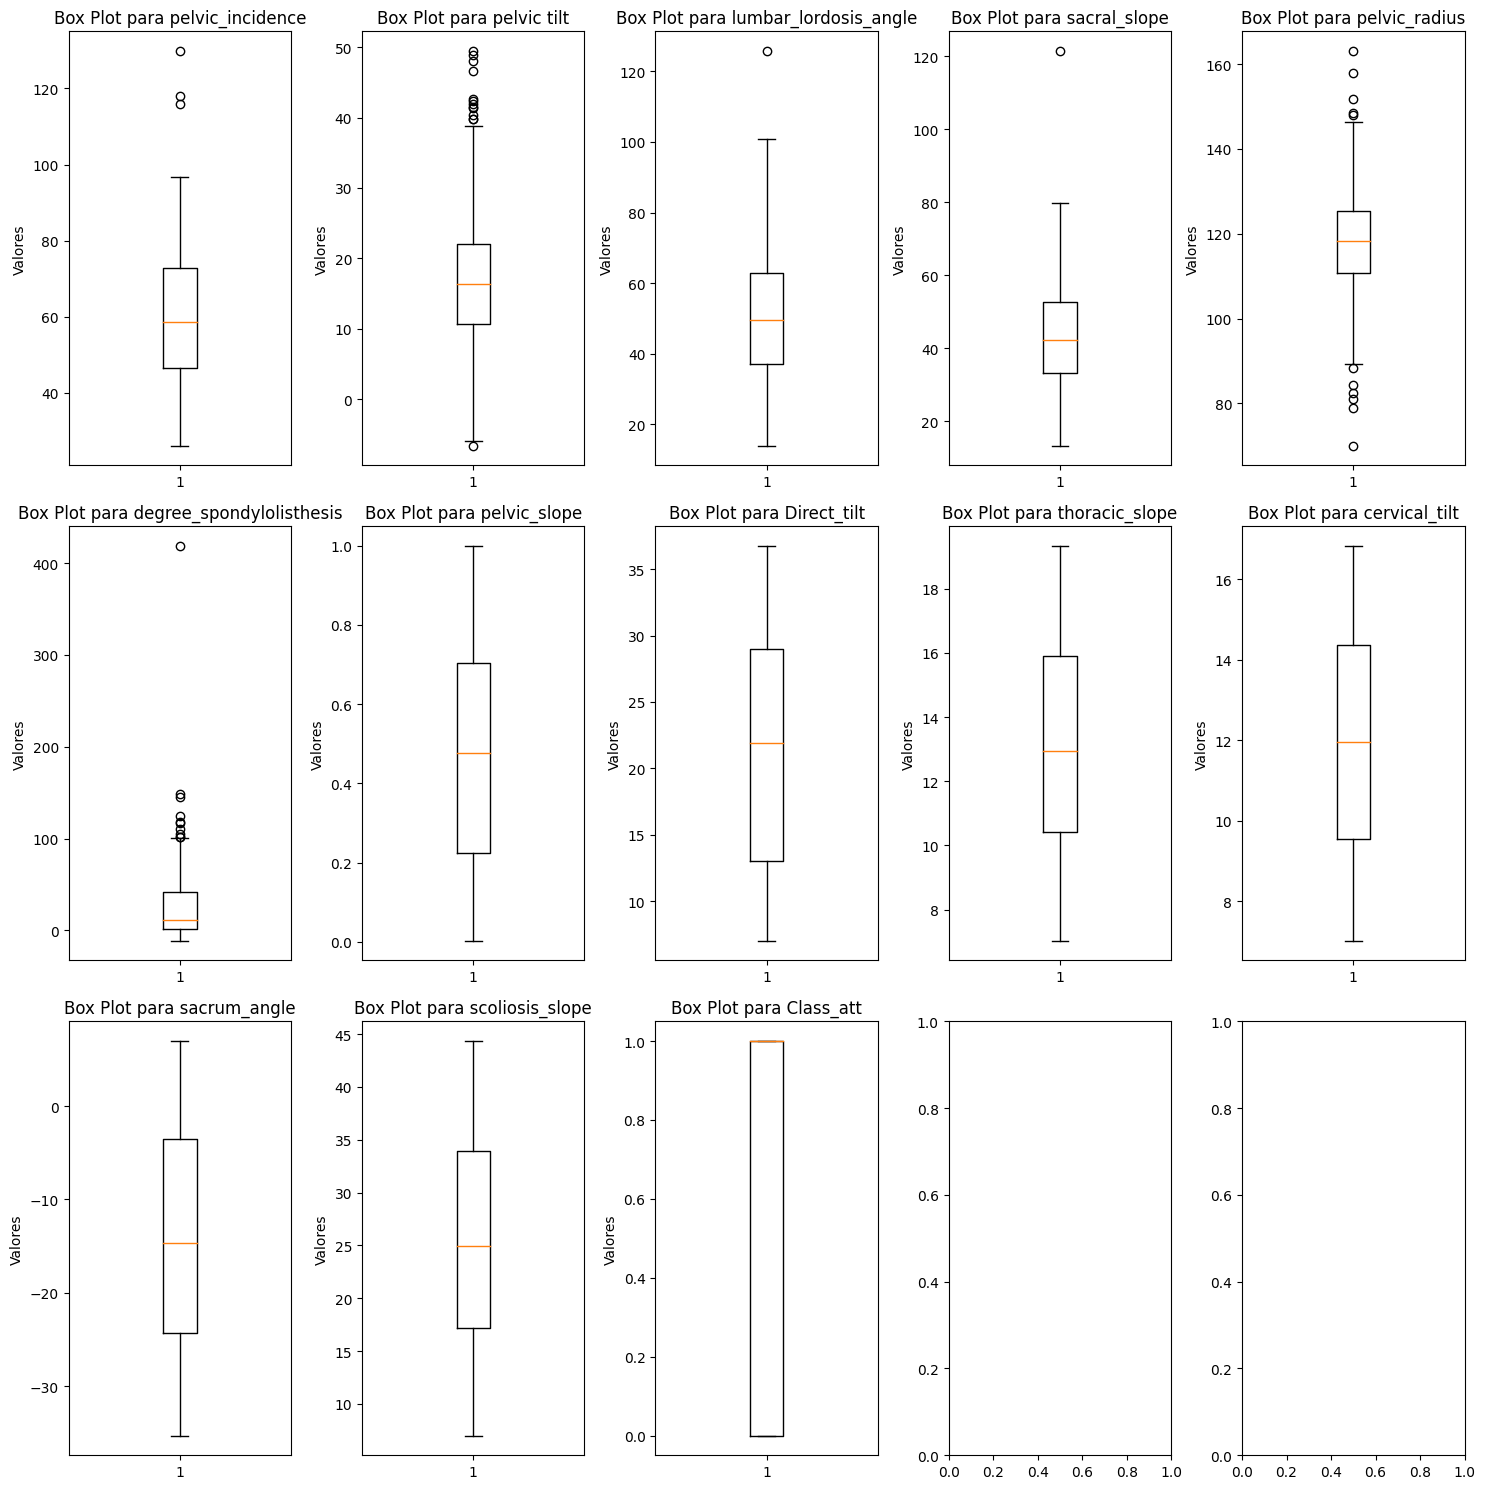

In [ ]:
# define número de colunas e linhas do conjunto de boxplot
num_columns = 5
num_rows = math.ceil(len(df_bl_sh.columns) / num_columns)

# fazendo os boxplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

for i, column in enumerate(df.columns):
  row = i // num_columns
  col = i % num_columns

  axes[row, col].boxplot(df[column])
  axes[row, col].set_title(f'Box Plot para {column}')
  axes[row, col].set_ylabel('Valores')


plt.tight_layout()
plt.show()

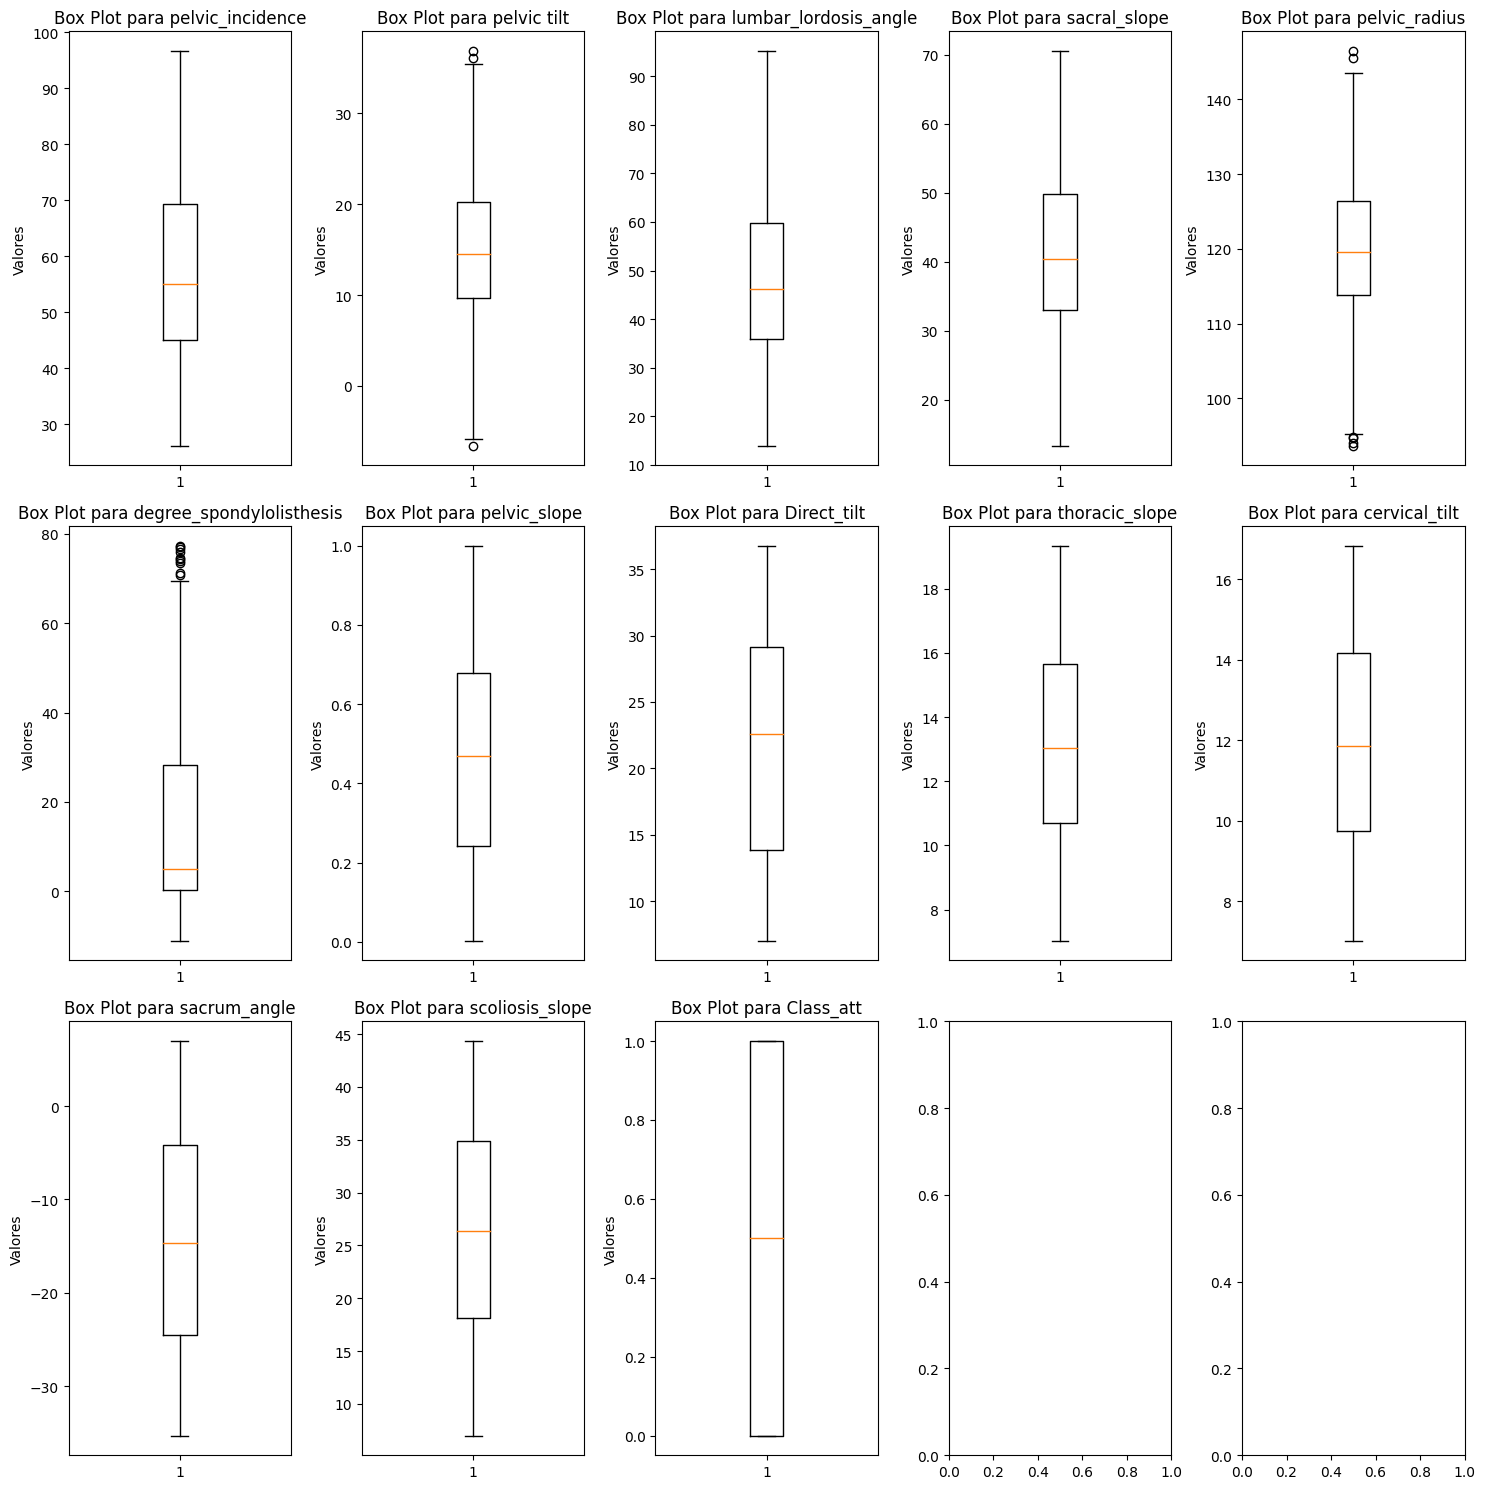

In [ ]:
# Criando uma cópia do DataFrame original
dfCopy = df_bl_sh.copy()

# Calculando os limites inferior e superior
q1 = dfCopy.quantile(0.25)
q3 = dfCopy.quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Removendo os outliers
for column in dfCopy.columns:
    dfCopy[column] = dfCopy[column][(dfCopy[column] >= limite_inferior[column]) & (dfCopy[column] <= limite_superior[column])]

# Determinando o número de linhas e colunas para a disposição dos subplots
num_columns = 5
num_rows = math.ceil(len(dfCopy.columns) / num_columns)

# Criando subplots para os novos boxplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Plotando os novos boxplots
for i, column in enumerate(dfCopy.columns):
    row = i // num_columns
    col = i % num_columns

    axes[row, col].boxplot(dfCopy[column].dropna())
    axes[row, col].set_title(f'Box Plot para {column}')
    axes[row, col].set_ylabel('Valores')

plt.tight_layout()
plt.show()

Os outliers anteriormente removidos, tornam-se valores NaN na tabela. Por isso, é usada a função dropna para remover estes valores. No final dessa operação, restam 372 instâncias no Dataframe.

In [ ]:
df_noOut = dfCopy.dropna()
len(df_noOut)

372

## **Divisão do Conjunto de Dados:**

Para construir o modelo, primeiramente dividiu-se o dataset em dados de treino e dados de teste. Devido ao pequeno número de instância no dataset, optou-se por não se ter dados de validação.

1/4 dos dados serão destinados para teste, e os 3/4 restantes para treinamento.

Essa análise foi realizada para cada um dos Datasets correspondentes às etapas do tratamento dos dados:


*  df : São os dados brutos.
*  df_balanced : O dataset apenas balanceado.
*  df_bl_sh : O dataset balanceado e embaralhado.
*  df_noOut : O dataset balanceado, embaralhado e sem outliers.




In [ ]:
# Dividir o conjunto de dados em treinamento e teste
train_brute, test_brute = train_test_split(df, test_size=.25, random_state=42)
train_bl, test_bl = train_test_split(df_balanced, test_size=.25, random_state=42)
train_bl_sh, test_bl_sh = train_test_split(df_bl_sh, test_size=.25, random_state=42)
train_noOut, test_noOut = train_test_split(df_noOut, test_size=.25, random_state=42)

# **Formulação dos modelos**

Para "alimentar" o classificador, o dataset de treinamento é dividio em dados de input e de output. Por se tratar de um processo de aprendizagem supervisionada, os "outputs" são os rótulos que indicam se a instância analisada apresenta ou não lombalgia.

In [ ]:
# Separar as características de entrada (X) e o alvo (y) para o conjunto de treinamento
X_train_brute = train_brute.iloc[:, :-1].values
Y_train_brute = train_brute.iloc[:, -1].values

X_train_bl = train_bl.iloc[:, :-1].values
Y_train_bl = train_bl.iloc[:, -1].values

X_train_bl_sh = train_bl_sh.iloc[:, :-1].values
Y_train_bl_sh = train_bl_sh.iloc[:, -1].values

X_train_noOut = train_noOut.iloc[:, :-1].values
Y_train_noOut = train_noOut.iloc[:, -1].values

Em seguida, diferentes configurações de modelo são inicializados fazendo uso do módulo *sklearn.neural_network.MLPClassifier*


In [ ]:
# Criar os classificadores MLP com diferentes configurações

# Rede ReLU com solver SGD
relu_sgd = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='relu', solver='sgd', random_state=1)

# Rede Logística com solver SGD
log_sgd = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='logistic', solver='sgd', random_state=1)

# Rede ReLU com solver Adam
relu_adam = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='relu', solver='adam', random_state=1)

# Rede Logística com solver Adam
log_adam = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='logistic', solver='adam', random_state=1)


Aqui, treinamos quatro variações do modelo MLP:

1. 'relu_sgd': Uma rede ReLU (Rectified Linear Unit) com o solver SGD (Stochastic Gradient Descent).
2. 'log_sgd': Uma rede logística (função sigmoid) com o solver SGD.
3. 'relu_adam': Uma rede ReLU com o solver Adam (um algoritmo otimizador mais avançado).
4. 'log_adam': Uma rede logística com o solver Adam.

Com isso podemos entender como as diferentes funções de ativação e otimizadores afetam o desempenho. Assim, podemos depois comparar esses modelos em termos de métricas de avaliação para determinar qual combinação produz os melhores resultados no seu conjunto de dados específico.

## **Avaliação do Modelo:**

**Explicação das métricas:**

Para mostrar os resultados criou-se uma função auxiliar, que contém:

Um score de acurácia definido pela quantidade de instâncias cuja predição corresponde exatamente ao rótulo designado



Um score F1 definido por:

    F1 = 2 * (precision * recall) / (precision + recall)


Um score de recall definido por :


    true_positives / (true_positives + fake_negatives)

Taxa de precisão:

    true_positives / (true_positives + fake_positives)




E uma matriz de confusão para facilitar a visualização.




In [ ]:
# Definir uma função para exibir os resultados da avaliação
def show_results(Y_test_bl, predictions):
  print('Accuracy score:', accuracy_score(Y_test_bl, predictions))
  print('F1 score:', f1_score(Y_test_bl, predictions))
  print('Precision:', precision_score(Y_test_bl, predictions))
  print('recall:', recall_score(Y_test_bl, predictions))

  disp = ConfusionMatrixDisplay(confusion_matrix(Y_test_bl, predictions), display_labels=None)
  disp.plot()
  plt.show()

De maneira análoga ao que foi feito no dataset de treinamento, o dataset de teste também foi dividido em dados de input e seus rótulos correspondentes. Os dados de input são usados como parâmetro para o modelo fazer a predição e os rótulos para comparar com os valores previstos e computar as métricas de desempenho.

In [ ]:
# Separar as características de entrada (X) e o alvo (Y) para o conjunto de teste
X_test_brute = test_brute.iloc[:,:-1].values
Y_test_brute = test_brute.iloc[:,-1].values

X_test_bl = test_bl.iloc[:,:-1].values
Y_test_bl = test_bl.iloc[:,-1].values

X_test_bl_sh = test_bl_sh.iloc[:,:-1].values
Y_test_bl_sh = test_bl_sh.iloc[:,-1].values

X_test_noOut = test_noOut.iloc[:,:-1].values
Y_test_noOut = test_noOut.iloc[:,-1].values

## **Comparações entre configurações diferentes do modelo**

Esta comparação será feita em cima do dataset bruto, a fim de definir a melhor configuração e aplicá-la nos demais datasets.

### **Relu-SGD:**


Accuracy score: 0.8333333333333334
F1 score: 0.8849557522123894
Precision: 0.8928571428571429
recall: 0.8771929824561403


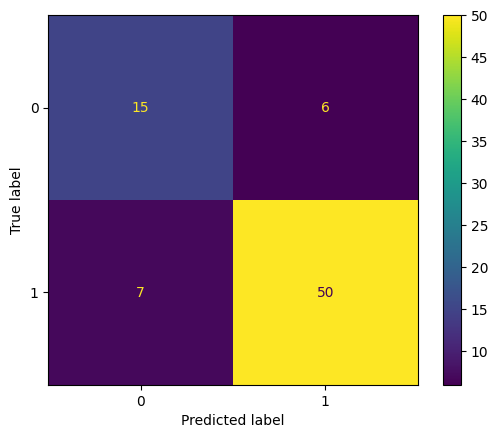

In [ ]:
relu_sgd.fit(X_train_brute, Y_train_brute)
# Fazer previsões no conjunto de teste usando a rede ReLU com solver SGD
y_pred_brute = relu_sgd.predict(X_test_brute)

# Exibir os resultados da avaliação usando a função definida anteriormente
show_results(Y_test_brute, y_pred_brute)

Podemos fazer a seguinte analise desse modelo:
* **Accuracy:** Indica que cerca de 83.3% das previsões do modelo estão corretas.

* **F1 Score:** Um valor próximo a 0.9 indica um bom equilíbrio. Aqui, o valor indica que o modelo está conseguindo manter um bom balanço.

* **Precision:** O valor dele pode ser interpretado como a proporção de verdadeiros positivos entre todas as instâncias previstas como positivas.

* **Recall:** Seu valor sugere que o modelo está identificando bem os casos positivos, mas pode estar sacrificando um pouco a precisão para conseguir isso.

Em geral, os resultados indicam que a primeira variação do modelo (ReLU com solver SGD) está oferecendo um equilíbrio razoável entre precisão e recall.

### **Logistic-SGD:**

Accuracy score: 0.7307692307692307
F1 score: 0.8444444444444443
Precision: 0.7307692307692307
recall: 1.0


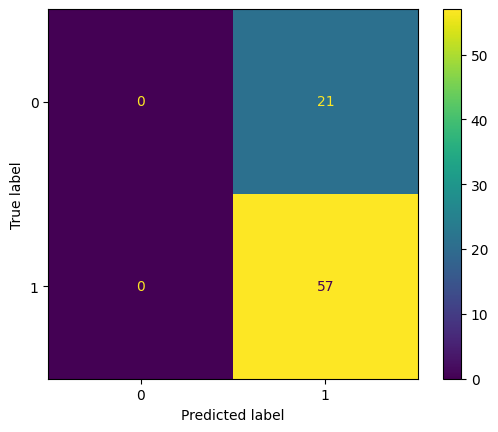

In [ ]:
log_sgd.fit(X_train_brute, Y_train_brute)

# Fazer previsões no conjunto de teste usando a função logística com solver SGD
y_pred_brute = log_sgd.predict(X_test_brute)

# Exibir os resultados da avaliação usando a função definida anteriormente
show_results(Y_test_brute, y_pred_brute)

Aqui já podemos indentificar uma situação diferente:
*   **Accuracy:** Apresenta um valor razoável que pode indicar que o modelo não está performando bem no conjunto de teste.
*   **F1 Score:** O valor indica um equilíbrio razoável entre as duas métricas, mas ainda é relativamente baixo.
* **Precision:** Ele está é relativamente baixo e pode indicar que o modelo está fazendo muitas previsões falsas positivas.
* **Recall:** O recall de 100% indica que o modelo está capturando todas as instâncias positivas reais. No entanto, isso também pode indicar que o modelo está prevendo muitos falsos positivos, o que é refletido na baixa precisão.

Em geral, os resultados dessa variação do modelo (logística com solver SGD) parecem ser insatisfatórios. A alta taxa de recall de 100% é impressionante, mas quando se analisa a matriz de confusão com atenção, repara-se que o modelo prevê todos os casos como positivo. Fazendo isso, ele ainda obtém uma acurácia relativamente razoável: Isso acontece porque os dados brutos são desbalanceados, e prevendo todos os casos como positivos ainda se acerta a maioria dos casos. Sendo assim, trata-se de um caso claro de *underfitting*, uma vez que ele é incapaz de prever casos negativos.

### **Relu-Adam**

Accuracy score: 0.7435897435897436
F1 score: 0.8412698412698412
Precision: 0.7681159420289855
recall: 0.9298245614035088


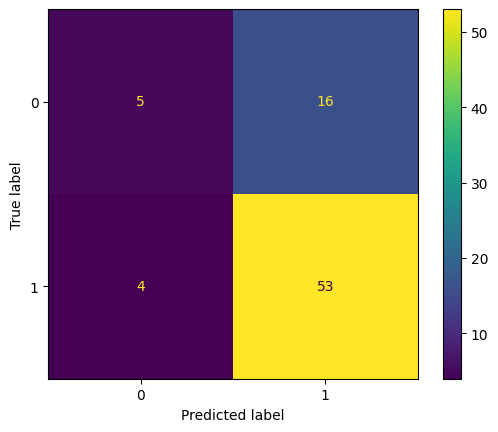

In [ ]:
relu_adam.fit(X_train_brute, Y_train_brute)
# Fazer previsões no conjunto de teste usando a rede ReLU com solver Adam
y_pred_brute = relu_adam.predict(X_test_brute)

# Exibir os resultados da avaliação usando a função definida anteriormente
show_results(Y_test_brute, y_pred_brute)

Nesse cenário podemos analisar que:
*   **Accuracy:** Tem resultado razoável, mas aparentemente insatisfatório para o modelo.
*   **F1 Score:** Indica um bom equilíbrio entre precisão e recall. Isso sugere que o modelo está performando relativamente bem em ambos os aspectos. Entretanto, essa métrica é ilusória devido ao desbalanceamento do dataset.
*   **Precision:** Está com um valor razoável e, a príncipio, sugere que o modelo está fazendo poucas previsões falsas positivas. O que também é ilusão, causada mais uma vez pelo desbalanceamento. Pela matriz de confusão é possível observar que a maioria dos casos negativos são previstos como falsos positivos.
*   **Recall:** Esse é um valor muito bom e sugere que o modelo está conseguindo identificar a maioria dos casos positivos. Mas como anteriormente mencionado, esse valor é inflado devido a maior quantidade de casos positivos.



Esses resultados indicam que a terceira variação do modelo (ReLU com solver Adam) está oferecendo um desempenho muito bom no conjunto de teste. As métricas de avaliação são consistentes e altas, o que sugere que o modelo está se adaptando bem aos dados e é capaz de fazer previsões precisas e confiáveis.

### **Logistic-Adam**

Accuracy score: 0.7692307692307693
F1 score: 0.8474576271186439
Precision: 0.819672131147541
recall: 0.8771929824561403


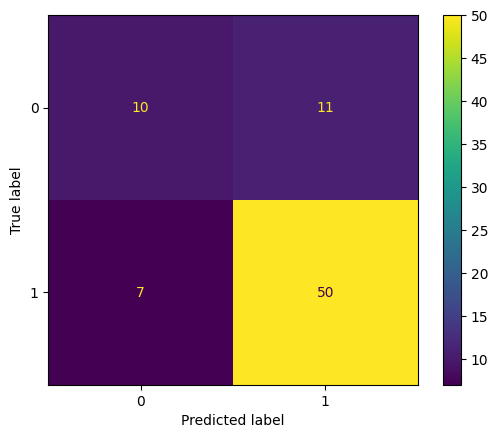

In [ ]:
log_adam.fit(X_train_brute, Y_train_brute)

# Fazer previsões no conjunto de teste usando a rede logística com solver Adam
y_pred_brute = log_adam.predict(X_test_brute)

# Exibir os resultados da avaliação usando a função definida anteriormente
show_results(Y_test_brute, y_pred_brute)

Aqui podemos analisar que:
*   **Accuracy:** Tem um resultado razoável de 76.9% .
*   **F1 Score:** Sugere que o modelo está performando bem em ambos os aspectos. Percebe-se, pela matriz de confusão, que este modelo é melhor em prever casos verdadeiros negativos, embora ainda não seja muito satisfatório.
*   **Precision:** Está com um valor sólido e indica que o modelo está fazendo previsões positivas com confiabilidade. Embora ainda seja válida a ressalva do desbalanceamento.
*   **Recall:** É um valor bastante bom e sugere que o modelo está conseguindo identificar a maioria dos casos positivos. O que, como mencionado anteriormente pode ser devido a grande quantidade destes no dataset.

Em geral, os resultados dessa variação do modelo (logística com solver Adam) parecem ser bons. As métricas de avaliação estão relativamente consistentes, o que sugere que o modelo está se adaptando melhor aos dados doque outros testados e é capaz de fazer previsões com qualidade regular.

### **Análise Comparativa:**

Ao analisar os resultados, é possível perceber algumas tendências:


* O modelo **Logística com solver SGD** mostrou resultados baixos em termos de acurácia, F1 score e precisão. Embora tenha um recall de 100%, isso não é necessariamente uma vantagem, já que ele  está prevendo todos ps casos como positivos, resultando em uma precisão mais baixa que o restante, embora relativamente alta por causa do desbalanceamento. Pode-se concluir que nessa configuração as previsões são pouco confiáveis.

* O modelo **ReLU com solver Adam** : Tem métricas parecidas com o Logistic-SGD. É um pouco melhor porque preve alguns casos verdadeiros negativos, mas de maneira muito similar, faz previsões muito enviesadas para o positivo.

* O modelo **Logistic-Adam** : Há melhoria nas métricas, embora não sejam substanciais, a verdadeira melhora pode ser observada na matriz de confusão - ainda mais casos verdadeiros negativos são identificados. Entretanto, ainda assim, o modelo prevê mais falsos positivos do que verdadeiros negativos.


**Escolha do Melhor Modelo:**

Em primeiro lugar, vale salientar que o otimizador Adam certamente performou de maneira insatisfatório/regular porque é designado para datasets com grande número de instâncias.

E dado o contexto de classificação de lombalgia, o modelo com a combinação mais equilibrada entre precisão e recall tende a ser preferível. Isso é especialmente importante porque tanto os falsos positivos quanto os falsos negativos podem ter consequências sérias.

Nesse sentido, o modelo **ReLU com solver SGD** mostra ser a melhor escolha entre as variações testadas. Ele oferece uma boa acurácia, um F1 score robusto e uma precisão confiável, enquanto mantém um recall bastante aceitável. Isso indica que ele é capaz de fazer previsões precisas tanto para casos positivos quanto negativos, minimizando os riscos de erros graves.



## **Comparação entre datasets**



Nesta seção, o intuito é comparar a performance do modelo com os diferentes datasets. Cada dataset representa uma etapa do tratamento de dados, com exceção da etapa dos dados brutos, que já foram testados anteriormente.

### **Dataset somente balanceado.**

Accuracy score: 0.8380952380952381
F1 score: 0.8210526315789473
Precision: 0.9512195121951219
recall: 0.7222222222222222


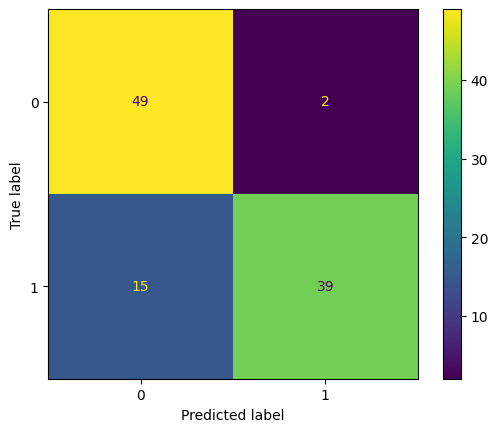

In [ ]:
relu_sgd.fit(X_train_bl, Y_train_bl)
y_pred_bl = relu_sgd.predict(X_test_bl)
show_results(Y_test_bl, y_pred_bl)

De modo geral, já é visível que o modelo perfoma de maneira satisfatória, prevendo quase todos verdadeiros negativos como tal e a maior parte dos verdadeiros positivos corretamente. Entretanto, observa-se que neste dataset há muitas previsões falso negativas, o que indicado pela taxa de recall. Isso certamente é preocupante, uma vez que o modelo ignora uma quantidade significativa de casos (ou pacientes) que precisam de tratamento.

### **Dataset balanceado e embaralhado**

Accuracy score: 0.9047619047619048
F1 score: 0.9038461538461539
Precision: 0.9791666666666666
recall: 0.8392857142857143


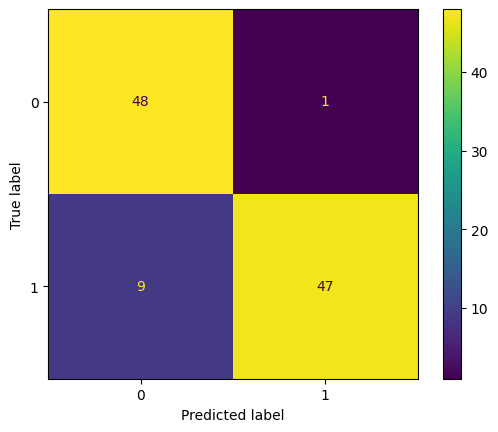

In [ ]:
relu_sgd.fit(X_train_bl_sh, Y_train_bl_sh)
y_pred_bl_sh = relu_sgd.predict(X_test_bl_sh)
show_results(Y_test_bl_sh, y_pred_bl_sh)

Neste caso, é possível observar métricas boas no geral. Inclusive, pode-se perceber que o recall aumenta significativamente, o que é claramente uma vantagem.

### **Dataset balanceado, embaralhado e sem outliers.**

Accuracy score: 0.8602150537634409
F1 score: 0.853932584269663
Precision: 0.9047619047619048
recall: 0.8085106382978723


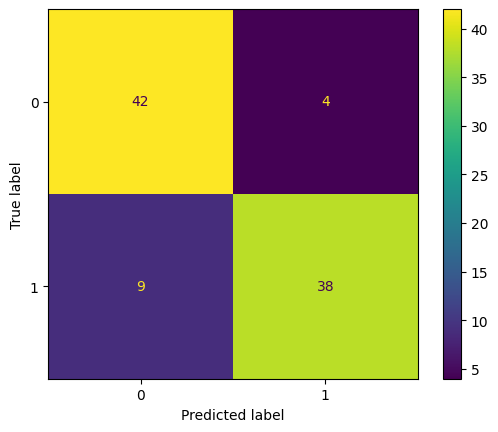

In [ ]:
relu_sgd.fit(X_train_noOut, Y_train_noOut)
y_pred_noOut = relu_sgd.predict(X_test_noOut)
show_results(Y_test_noOut, y_pred_noOut)

Neste caso, também se observam boas métricas. Entretanto, de forma contraintuitiva, este caso performa pior do que o que inclui os outliers.

Fazendo uma análise mais cuidadosa desse dataset, percebe-se que ele apresenta, na verdade, um leve desbalanceamento : Ao retirar os outliers, o dataset passa a ser um pouco mais balanceado do que era inicialmente, mas menos do que o dataset balanceado que inclui os outliers.

## **Rebalanceamento do dataset sem outliers**

In [ ]:
df_noOut['Class_att'].value_counts()

0    209
1    163
Name: Class_att, dtype: int64

In [ ]:
sm = SMOTE(sampling_strategy= 'minority', random_state=42)

X_df_noOut = df_noOut.iloc[:, :-1]
Y_df_noOut = df_noOut.iloc[:, -1]
X_res, y_res = sm.fit_resample(X_df_noOut, Y_df_noOut)

X_res['Class_att'] = y_res.values
df_noOut_balanced = X_res.copy()

df_noOut_balanced['Class_att'].value_counts()

0    209
1    209
Name: Class_att, dtype: int64

Para testar o modelo com este dataset, é necessário fazer as pré-configurações feitas para os demais datasets. O que é feito na célula abaixo:

In [ ]:
train_noOut_balanced, test_noOut_balanced = train_test_split(df_noOut_balanced, test_size=.25, random_state=42) #divide o dataset em dados de teste e treinamento
X_train_noOut_balanced = train_noOut_balanced.iloc[:, :-1].values #obtem um array de valores de input de treinamento
Y_train_noOut_balanced = train_noOut_balanced.iloc[:, -1].values #obtem um array de valores de output de treinamento
X_test_noOut_balanced = test_noOut_balanced.iloc[:,:-1].values #obtem um array de valores de input de teste
Y_test_noOut_balanced = test_noOut_balanced.iloc[:,-1].values #obtem um array de valores de output de teste

Treinando, enfim, o modelo com o dataset sem outliers devidamente balanceado. Obtém-se:

Accuracy score: 0.9047619047619048
F1 score: 0.8809523809523809
Precision: 0.9736842105263158
recall: 0.8043478260869565


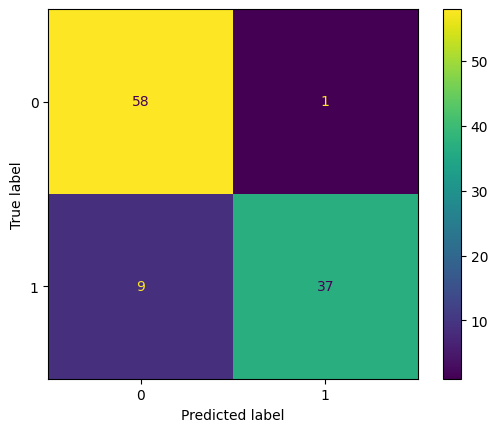

In [ ]:
relu_sgd.fit(X_train_noOut_balanced, Y_train_noOut_balanced)
y_pred_noOut_balanced = relu_sgd.predict(X_test_noOut_balanced)
show_results(Y_test_noOut_balanced, y_pred_noOut_balanced)

As métricas apresentadas aparentam ser boas. Vale a pena ressaltar, entretanto, que muito assemelham às do caso em que os outliers não são removidos. Mas, para a próxima seção, optou-se pelo uso do dataset sem outliers balanceado, uma vez que é considerada a abordagem mais completa de tratamento dos dados.

## **Variação em outros parâmetros**

### **Número de iterações máximo:**

O parâmetro *max_iter* foi modificado de 300 para 1000.

Accuracy score: 0.9238095238095239
F1 score: 0.909090909090909
Precision: 0.9523809523809523
recall: 0.8695652173913043


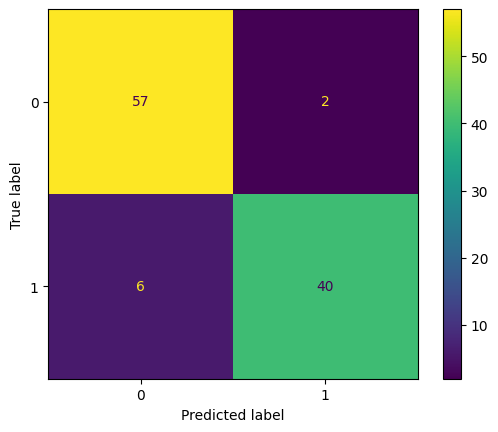

In [ ]:
relu_sgd_1000 = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, activation='relu', solver='sgd', random_state=42)
relu_sgd_1000.fit(X_train_noOut_balanced, Y_train_noOut_balanced)
y_pred_noOut_balanced = relu_sgd_1000.predict(X_test_noOut_balanced)
show_results(Y_test_noOut_balanced, y_pred_noOut_balanced)

É possível perceber melhora a partir dessa modificação, o que é um indício de que o SGD não tinha convergido ainda antes de 300 iterações.

### **Variação no número de neurônios das camadas**

O parâmetro de hidden_layer_sizes, que corresponde a quantidade de neurônios em cada camada, foi modificado de (150, 100, 50) para (75, 50, 25), ou seja cada uma das camadas teve o número de neurônios dividido pela metade.

Accuracy score: 0.8761904761904762
F1 score: 0.8631578947368421
Precision: 0.8367346938775511
recall: 0.8913043478260869


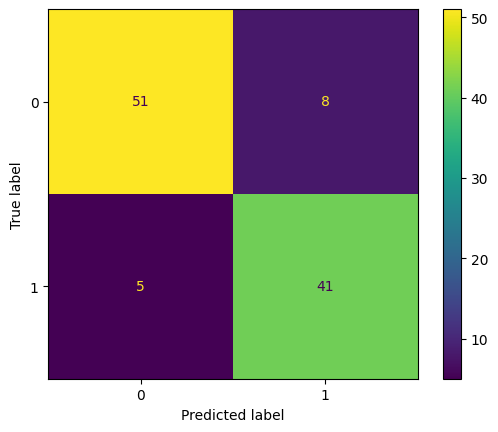

In [ ]:
relu_sgd_metade= MLPClassifier(hidden_layer_sizes=(75, 50, 25), max_iter=1000, activation='relu', solver='sgd', random_state=42)
relu_sgd_metade.fit(X_train_noOut_balanced, Y_train_noOut_balanced)
y_pred_noOut_balanced = relu_sgd_metade.predict(X_test_noOut_balanced)
show_results(Y_test_noOut_balanced, y_pred_noOut_balanced)

Como de se esperar, com a diminuição dos neurônios, houve uma ligeira diminuição da acurácia do modelo.

O parâmetro de hidden_layer_sizes, que corresponde a quantidade de neurônios em cada camada, foi modificado de (150, 100, 50) para (300, 200, 100), ou seja cada uma das camadas teve o número de neurônios dobrados.

Accuracy score: 0.9047619047619048
F1 score: 0.878048780487805
Precision: 1.0
recall: 0.782608695652174


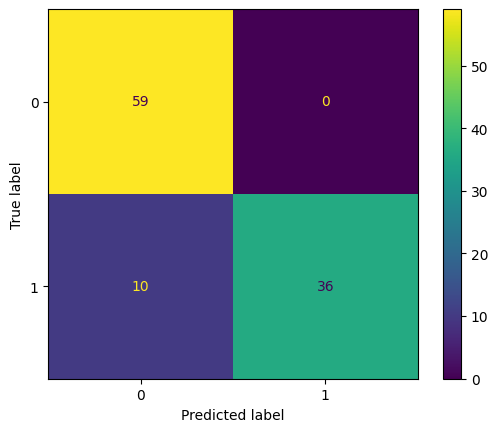

In [ ]:
relu_sgd_dobro = MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=1000, activation='relu', solver='sgd', random_state=42)
relu_sgd_dobro.fit(X_train_noOut_balanced, Y_train_noOut_balanced)
y_pred_noOut_balanced = relu_sgd_dobro.predict(X_test_noOut_balanced)
show_results(Y_test_noOut_balanced, y_pred_noOut_balanced)

Por fim, ao aumentar o número de neurônios em camada , não se observa melhora significativa. Na verdade, constata-se um leve piora na acurácia e no recall.